In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gymnasium as gym

from algos.basic.utils import OPTIMAL_FROZEN_LAKE_POLICY, random_stochastic_policy
from algos.basic.policy_evaluation import policy_evaluation

In [2]:
env = gym.make(
        'FrozenLake-v1',
        desc=None,
        map_name="4x4",
        is_slippery=False,
        success_rate=1.0/3.0,
        reward_schedule=(1, 0, 0),
        render_mode="ansi"
    )

mdp = env.unwrapped.P

In [3]:
def compute_Q_function(V, mdp, gamma=1.0):
    Q = np.zeros((len(mdp), len(mdp[0])), dtype=np.float64)

    for state in range(len(mdp)):
        for action in range(len(mdp[state])):
            for prob, next_state, reward, done in mdp[state][action]:
                Q[state, action] += prob * (reward + gamma * V[next_state] * (not done))
            
    return Q

def policy_improvement(V, mdp, gamma=1.0):
    Q = compute_Q_function(V, mdp, gamma)
    new_Q = np.zeros_like(Q)
    new_Q[np.arange(len(Q)), np.argmax(Q, axis=1)] = 1
    return new_Q

<Axes: >

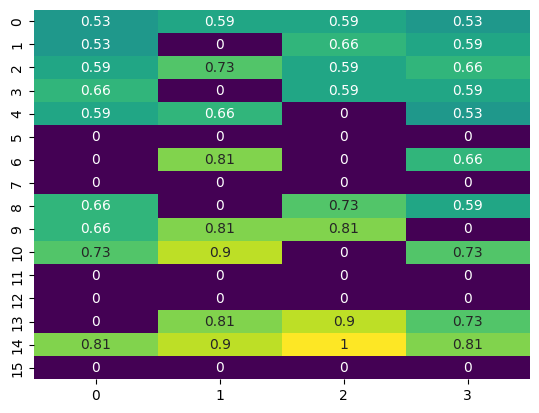

In [4]:
gamma = 0.9
optimal_V = policy_evaluation(OPTIMAL_FROZEN_LAKE_POLICY, mdp, gamma=gamma)
optimal_V
optimal_Q = compute_Q_function(optimal_V, mdp, gamma=gamma)
sns.heatmap(optimal_Q, annot=True, cmap="viridis", cbar=False)

Text(0.5, 1.0, 'Value Function of Improved Policy')

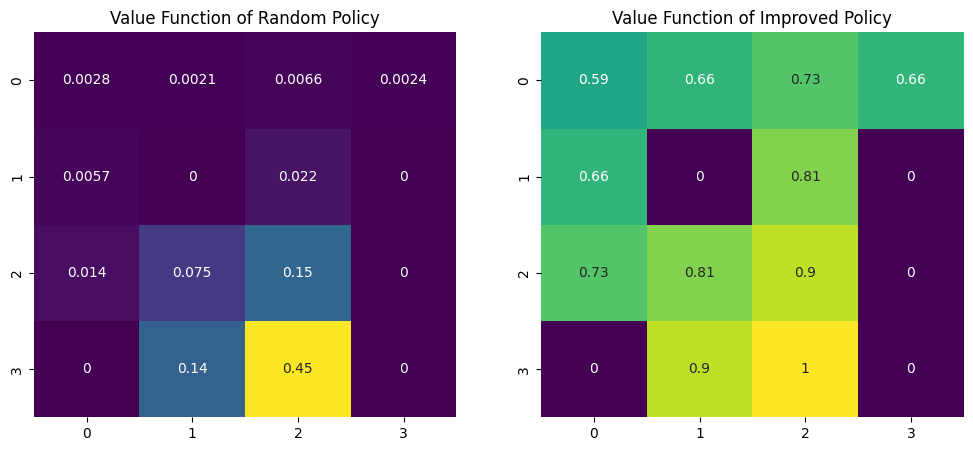

In [ ]:
random_policy = random_stochastic_policy(env)
random_V = policy_evaluation(random_policy, mdp, gamma=gamma)
random_V
new_random_policy = policy_improvement(random_V, mdp, gamma=gamma)
new_random_V = policy_evaluation(new_random_policy, mdp, gamma=gamma)

fig, axes = plt.subplots(2, 2, figsize=(12, 5))

sns.heatmap(random_V.reshape(4, 4), annot=True, cmap="viridis", cbar=False, ax=axes[0])
axes[0].set_title("Value Function of Random Policy")
sns.heatmap(new_random_V.reshape(4, 4), annot=True, cmap="viridis", cbar=False, ax=axes[1])
axes[1].set_title("Value Function of Improved Policy")

In [ ]:
def policy_iteration(env, gamma=1.0, theta=1e-10):
    mdp = env.unwrapped.P
    policy = random_stochastic_policy(env)

    while True:
        old_policy = policy.copy()

        V = policy_evaluation(policy, mdp, gamma=gamma, theta=theta)

        pi = policy_improvement(V, mdp, gamma=gamma)

        if np.array_equal(pi, old_policy):
            break
